# KNN (K-vecinos-cercanos)

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![cazas_jedi](https://drive.google.com/uc?export=view&id=1vTjeTyxBjZxMm6M3g0FRbpkxzhLftQYu)

Fuente de la imagen: Imagen propia

El algoritmo de KNN es uno de los más sencillos que hay en cuanto a su funcionamiento interno. Su objetivo es encontrar las muestras (filas de nuestro dataset) más cercanas por sus caracteríticas a la muestra objetivo.

Digamos que tenemos un dataset donde X es la matriz que engloba todas las filas y columnas de las variables predictoras. También tenemos Y donde se almacenan los valores de nuestra variable objetivo. Por ejemplo:

**X**: marca y modelo del coche, potencia, consumo, calidad de chasis, calidad interior, número de puertas y automático. (7 variables)

**Y**: precio del coche

Como hicimos en el tema anterior de Árboles de Decisión, lo dividimos en Xtrain, Ytrain, Xtest e Ytest. A partir de aquí pueden pasar dos cosas:
* **Entrenamos un modelo:**

Usamos Xtrain e Ytrain para entrenar el modelo y KNN lo que hace es medir distancias entre cada una de las muestras (filas). Hay que fijarse en que estamos hablando de distancias en un espacio de 7 dimensiones. Una vez tenemos el modelo, lo validamos con Xtest e Ytest como ocurría con los AD. Cuando le damos una muestra a testear, encuentra las K muestras de Xtrain más cercanas y devuelve un valor de Y basado en sus Ytrain respectivos. 

Es decir, si K=5, KNN encuentra las 5 muestras de Xtrain más cercanas. Sus valores de Ytrain pueden ser:
Si $Y_{0} = 20.000$, $Y_{1} = 25.000$, $Y_{2} = 22.000$, $Y_{3} = 15.000$, $Y_{4} = 31.000$

El resultado que nos devolverá KNN será la media: *22.600€*

* **Lanzamos la validación directamente (Lazy Learner)**

No existe un entrenamiento. Cuando llega una muestra a testear de Xtest, el algoritmo se pone en funcionamiento buscando las muestras de Xtrain que más cerca estén. Si usamos el ejemplo de antes, su resultado final será el mismo.



<!-- script html for "Recuerda" -->
<!-- espaciado salto <br> espaciado de linea &nbsp; -->
<p> <mark>PIENSA UN MINUTO</mark> </p>
<hr>
<BR>

***¿Cuál es la diferencia entonces?***

<BR>

Si entrenamos (primer caso) tardaremos más en la fase de entrenamiento pero muy poco en la fase de predicción. Sin embargo, si lo hacemos sin entrenar, tardará más en la fase de predicción porque no tendrá un modelo precalculado sobre el que basarse.

Vamos a pasar a verlo con más detalle en los siguientes apartados.

## **1. Clasificación**


### **1.1. Funcionamiento**

Es muy sencillo. Vamos a verlo con la siguiente imagen:

![knn_class](https://drive.google.com/uc?export=view&id=1y00FyL2MJBNpEdTthp3315s4ySxntRio)

Fuente de la imagen: Elaboración propia

En este caso, tenemos un dataset de dos dimensiones $X_{1}$ y $X_{2}$ con valores $Y$ verdes y rojos. Al trata de estimar el color del nuevo punto (rombo azul) lo que hace KNN es buscar los K puntos (en este caso K=5) más cercanos y estimar que su valor de Y es rojo. 

¿Por qué? Simplemente porque hay más rojos que verdes entre los 5 vecinos más cercanos.

**¿Qué ocurre si el número de clases es par y el valor de K también?**

Veamos un ejemplo sencillo:

Tenemos un dataset con una variable a predecir/objetivo que es binaria (0,1) y seleccionamos K=4.
Puede ocurrir que de los cuatro vecinos-cercanos, 2 sean de la clase "0" y 2 de la clase "1". No tenemos una clase predominante y puede crear problemas. 

*Conclusión*: vamos a tratar de seleccionar K impares cuando estamos trabajando con número par de clases.








### **1.2. Preprocesado**

KNN es un modelo en el que se calculan distancias (con unas métricas u otras) y por tanto tiene una base geométrica. Estas distancias se calculan en espacios n-dimensionales, donde "$n$" es el número de variables predictoras ($X_1, X_2, ..., X_n$).

Imaginemos que tenemos un caso muy sencillo con sólo dos variables predictoras $X_1$ y $X_2$.

Si $X_1$ tiene valores entre 0 y 1: 0.2, 0.5, 0.8, 0.1 y 1; 

y $X_2$ tiene valores entre 0 y 1000: 500, 550, 840, 100 y 947

El plano en el que trabajaremos será un plano "estirado" con un eje X en [0,1] y un eje Y en [0,1000]. Para que KNN funcione bien precisa de calcular las distancias entre puntos que están en una zona común del espacio/plano.

*¿Cómo hacemos esto?*

Necesitaremos escalar los datos de las variables predictoras. Para ello la librería Scilit-Learn tiene una funcionalidad que nos facilita mucho el trabajo:



```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(X).transform(X)
```

Lo que obtenemos es una serie de variables con media = 0 y desviación estándar = 1.



















### **1.3. Programación en Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

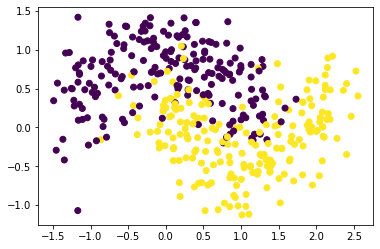

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.3, random_state=42)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

(320, 2) (320,)
(80, 2) (80,)


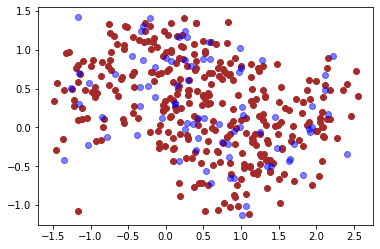

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

plt.scatter(x=X_train[:,0], y=X_train[:,1], c="brown")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c="blue", alpha=0.5)
plt.show()


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.50
Precisión sobre los datos de test: 87.50


**Creamos una función en la que podamos dibujar los puntos de train, test y predicciones con el modelo de fondo**

In [5]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )

    plt.suptitle("Áreas definidas por el Árbol de Decisión")
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

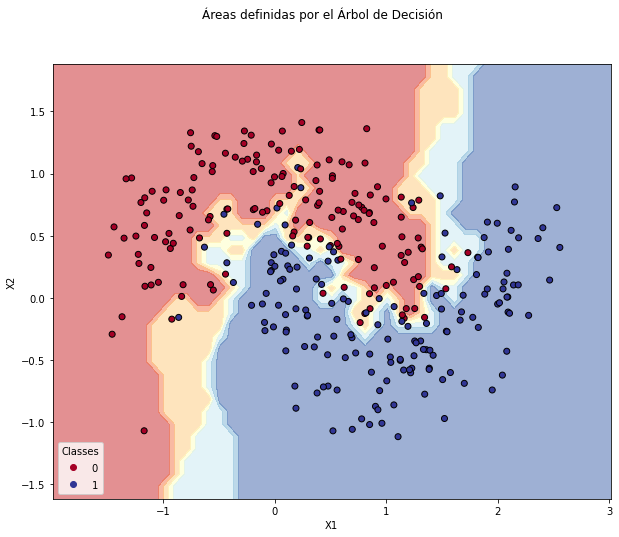

In [8]:
plt.figure(figsize=(10,8))
plot_boundaries_test(X_train, y_train, knn_model, True, X_train, y_train)

**Vamos a generar diferentes modelos para diferentes valores de K**

Precisión sobre los datos de entrenamiento: 92.50
Precisión sobre los datos de test: 87.50


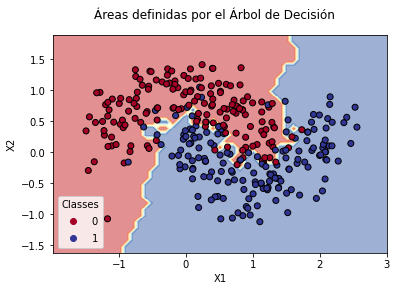

Precisión sobre los datos de entrenamiento: 90.31
Precisión sobre los datos de test: 90.00


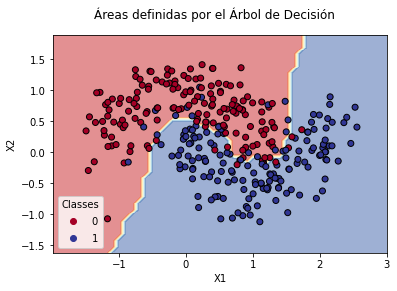

Precisión sobre los datos de entrenamiento: 88.75
Precisión sobre los datos de test: 88.75


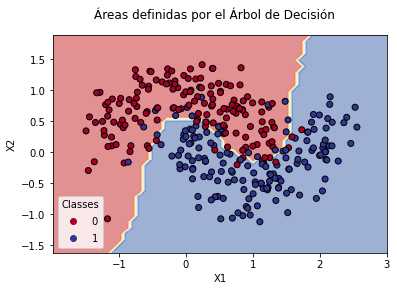

Precisión sobre los datos de entrenamiento: 87.19
Precisión sobre los datos de test: 95.00


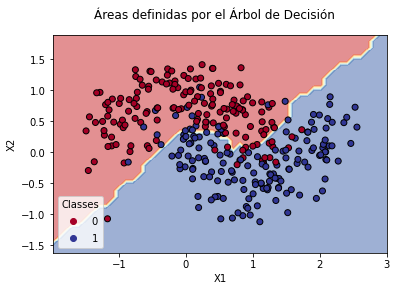

In [9]:
for k in [3, 11, 21, 99]:
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  knn_model.fit(X_train, y_train)
  pred_train = knn_model.predict(X_train)
  pred_test = knn_model.predict(X_test)
  print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
  print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))
  plot_boundaries_test(X_train, y_train, knn_model, False, X_train, y_train)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=21, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 88.75
Precisión sobre los datos de test: 88.75


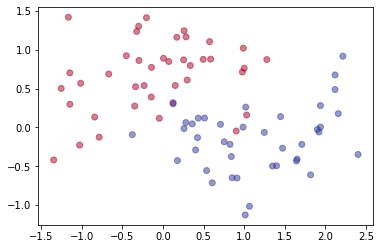

In [20]:
### Gráfica con la situación de los valores de Xtest e ytest
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test, alpha=0.5, cmap=plt.cm.RdYlBu )
plt.show()

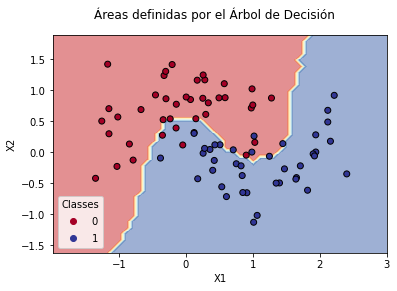

In [21]:
## Vamos a dibujar los puntos de test con el modelo de fondo
## Como se puede ver tenemos puntos de Xtest rojos en la zona azul, y azules en la zona roja.
## Nuestro modelo va a fallar en la estimación de estos puntos
plot_boundaries_test(X_train, y_train, knn_model, False, X_test, y_test)

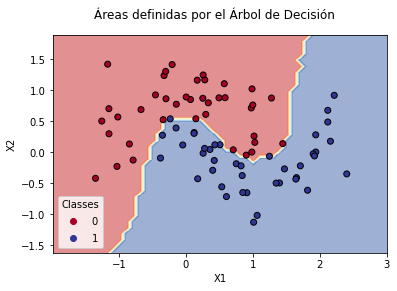

In [22]:
## En la predicción, cambia los colores de los puntos atendiendo a su posición en cada semiplano
## Todos los que ha cambiado son fallos del modelo
plot_boundaries_test(X_train, y_train, knn_model, False, X_test, pred_test)

**Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, pred_test)

array([[35,  5],
       [ 4, 36]])

Confusion matrix:



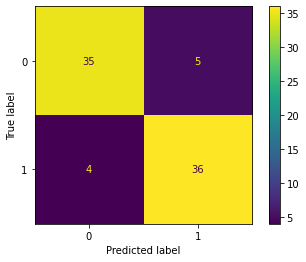

In [24]:
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

**Vamos a probar con weights = "distance"**

Esto quiere decir que vamos a tener en cuenta la distancia de cada una de los K puntos seleccionados hasta el punto objetivo. No se predice por conteo sino por cálculo de distancias.

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=21, weights="distance", metric="minkowski")
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))


Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 87.50


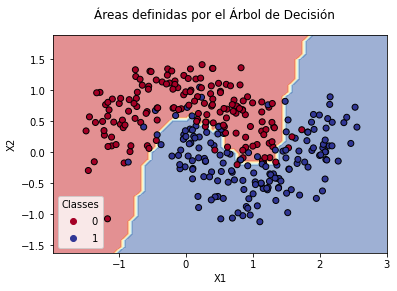

In [17]:
plot_boundaries_test(X_train, y_train, knn_model, False, X_train, y_train)

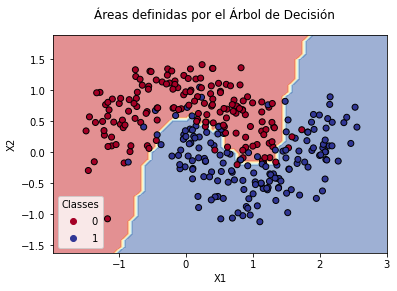

In [26]:
## Los puntos azules y rojos de X_train, Y_train no cambian por estar a un lado u otro de la frontera.
## El modelo (frontera) es el mismo que cuando weights="uniform"; pero al realizar los cálculos de tiene en cuenta las distancias y eso lo cambia todo
## Al tener weights="distance" la frontera ya no es tan decisiva.
plot_boundaries_test(X_train, y_train, knn_model, False, X_train, pred_train)

In [27]:
print (sum(y_train == pred_train))
print (sum(y_train != pred_train))

320
0


Confusion matrix:



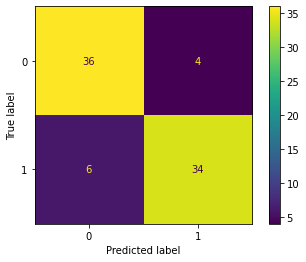

In [28]:
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

**¿Cuál es el valor de K que mejor rendimiento tiene?**

In [29]:
k_list = []
score_train_list = []
score_test_list = []

for K in list(range(1,30,3)):
  knn_model = KNeighborsClassifier(n_neighbors=K, weights="uniform", metric="minkowski")
  knn_model.fit(X_train, y_train)

  ## Generación de listas
  k_list.append(K)
  score_train_list.append(100.0*knn_model.score(X_train, y_train))
  score_test_list.append(100.0*knn_model.score(X_test, y_test))

df = pd.DataFrame({"K":k_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

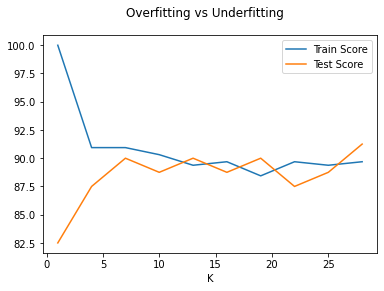

In [30]:
df.set_index("K", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Lo normal es que la curva de Train esté siempre por encima de Test cuando hablamos de "accuracy". Pero también hay que tener en cuenta que "accuracy" no es la mejor métrica a tener en cuenta cuando hablamos de Clasificación. Aunque sí nos sirve como referencia para seleccionar el valor de K.

**ROC-Curve (AUC)**

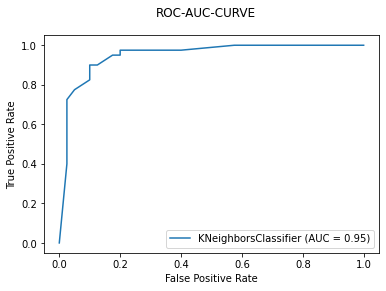

In [31]:
from sklearn.metrics import plot_roc_curve
knn_model = KNeighborsClassifier(n_neighbors=19, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
plot_roc_curve(knn_model, X_test, y_test)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

In [34]:
knn_model.predict_proba(X_test)[0:10]

array([[0.94736842, 0.05263158],
       [0.05263158, 0.94736842],
       [0.        , 1.        ],
       [0.89473684, 0.10526316],
       [0.84210526, 0.15789474],
       [0.84210526, 0.15789474],
       [1.        , 0.        ],
       [0.89473684, 0.10526316],
       [0.57894737, 0.42105263],
       [0.10526316, 0.89473684]])

In [35]:
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,0]))
print (roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1]))

0.05093750000000001
0.9490625


## **2. Regresión**

### **2.1. Funcionamiento**

La base del funcionamiento es la misma que en Clasificación. La única diferencia radica en la forma en que se calculan los resultados.

En Regresión, cuando se han encontrado los K vecinos más cercanos se hace la media de los valores $y_1, y_2, ..., y_k$ de cada uno de ellos.


### **2.2. Preprocesado**

El preprocesado es el mismo que en Clasificacion: escalado de variables predictoras

### **2.3. Programación en Python**

Vamos a verlo con un ejemplo.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

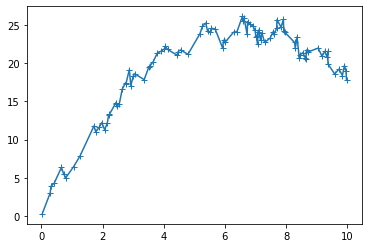

In [37]:
x = 10 * np.random.rand(100)
x = np.sort(x)

def model(x, sigma=0.7):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    trend = -0.5*x**2+7*x
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise + trend

y = model(x)
plt.plot(x, y, marker='+');

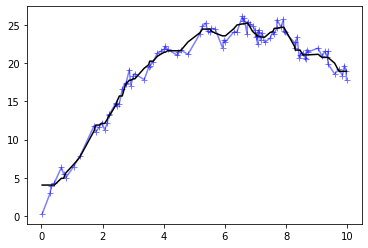

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=7, weights="uniform", metric="minkowski")
knn_reg.fit(x[:, None],y)
y_pred = knn_reg.predict(x[:, None])

plt.plot(x, y, marker='+', c="blue", alpha=0.5);
plt.plot(x, y_pred, c = "black");

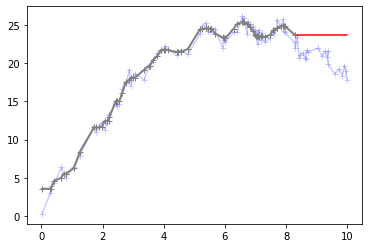

In [39]:
x_forecast = x[80:100, None]
y_forecast = y[80:100]
x_train = x[0:80, None]
y_train = y[0:80]

knn_reg = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
y_pred_train = knn_reg.predict(x_train)
y_forecast = knn_reg.predict(x_forecast)

plt.plot(x, y, marker='+', c="blue", alpha=0.2);
plt.plot(x_train, y_pred_train, marker='+', c="gray", lw=2);
plt.plot(x_forecast, y_forecast, '-k', c = "red");

Vamos a calcular los vecinos que encuentra un punto en la zona de entrenamiento y los de la zona de test:

In [40]:
len(x_train)

80

In [50]:
x_train[50][:,None]

array([[6.01737335]])

In [44]:
pred = knn_reg.predict(x_train[50][:,None])
distance, index = knn_reg.kneighbors(x_train[50][:,None])
print (distance, index, pred)

[[0.         0.0595328  0.09344375 0.27086038 0.33787751]] [[50 49 48 51 47]] [23.25923697]


In [47]:
y[[50, 49, 48, 51, 47]]

array([22.77828153, 22.99476132, 21.99500173, 24.06080037, 24.46733989])

**Otro ejemplo de Regresión**

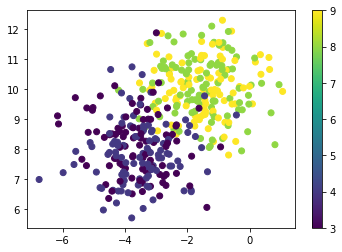

In [51]:
from sklearn.datasets import make_blobs
N = 400
X, y = make_blobs(n_samples=400, random_state=42,centers=1)
y[0:200] = np.random.randint(8, 10, 200)
y[200:400] = np.random.randint(3, 5, 200)
X[0:200] = X[0:200]+1 
X[200:400] = X[200:400]-1
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.colorbar()
plt.show()

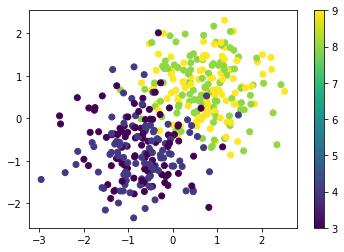

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit(X).transform(X)
plt.scatter(x=Xs[:,0], y=Xs[:,1], c=y)
plt.colorbar()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


0.7700970873786408


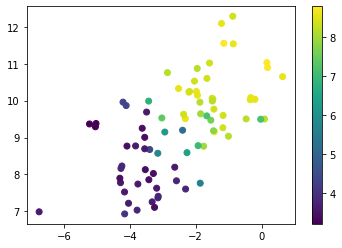

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_reg = KNeighborsRegressor(n_neighbors=5, weights="uniform", metric="minkowski")
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)
print(r2_score(y_test,y_pred))

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.colorbar();

In [61]:
for k in list(range(1,30,3)):
  knn_model = KNeighborsRegressor(n_neighbors=k, weights="uniform", metric="minkowski")
  knn_model.fit(X_train, y_train)
  pred_train = knn_model.predict(X_train)
  pred_test = knn_model.predict(X_test)
  print(k)
  print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
  print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

1
Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 71.26
4
Precisión sobre los datos de entrenamiento: 82.42
Precisión sobre los datos de test: 74.36
7
Precisión sobre los datos de entrenamiento: 79.61
Precisión sobre los datos de test: 76.78
10
Precisión sobre los datos de entrenamiento: 77.40
Precisión sobre los datos de test: 76.55
13
Precisión sobre los datos de entrenamiento: 76.41
Precisión sobre los datos de test: 75.46
16
Precisión sobre los datos de entrenamiento: 75.65
Precisión sobre los datos de test: 74.63
19
Precisión sobre los datos de entrenamiento: 76.90
Precisión sobre los datos de test: 76.20
22
Precisión sobre los datos de entrenamiento: 76.84
Precisión sobre los datos de test: 77.56
25
Precisión sobre los datos de entrenamiento: 77.33
Precisión sobre los datos de test: 77.72
28
Precisión sobre los datos de entrenamiento: 77.18
Precisión sobre los datos de test: 77.85


## **3. Overfitting y underfitting**

Con el siguiente gráfico se explica cómo afecta K a este problema:

![over_underfitting](https://drive.google.com/uc?export=view&id=1pVnRlMHRlpbA4BwL35HZW3LwVq7YCSF4)


Fuente de la imagen: Elaboración propia

## **4. Parámetros**

Aunque ya hemos ido viendo alguno de los parámetros en los ejemplos de programación, vamos a repasarlos.

Si vamos a la página web de Scikit-Learn donde se muestra el [KNNClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), podemos ver los parámetros más importantes a tener en cuenta.

* **n_neighbors**: es, sin duda, el parámetro más importante de todos al darnos la oportunidad de decirle al modelo cuántos vecinos-cercanos tiene que usar para calcular la predicción.

* **weights**: 
  * **Uniform**: para hacer el cálculo final de estimación/predicción no tiene en cuenta las distancias, sólo el número de puntos (como hemos hecho en el ejemplo del dibujo)
  * **Distance**: sí tiene en cuenta las distancias. De este modo no sólo hace un recuento de los puntos sino que los pondera por la inversa de su distancia al objetivo. Es decir, cuanto más cerca más importancia le da al punto en cuestión. Puede ocurrir, por tanto, que haya más de un color pero la estimación elija el otro.

* **metric**: es la fórmula que se va a utilizar para calcular las distancias. Por defecto, scikit-learn usa la métrica de "Minkowski". En la siguiente [url](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) tenemos las diferentes métricas a usar. Las más usadas son:
  * Minkowski: por ser la que viene por defecto
  * Euclidean: que realiza un cálculo de distancias geométricas
  * Haversine: para distancias geoespaciales al tener en cuenta la forma elítica de la Tierra

* **n_jobs**: con este parámetro podemos decidir cuántos "cores" de nuestro sistema (ordenador, colab, etc...) queremos usar para el entrenamiento. Si le damos el valor de -1, los usará todos.

## **5. Pros y contras**

**Contras**:
1. Uno de los mayores problemas que podemos tener con KNN es que incrementa su complejidad cuando el dataset tiene un gran número de variables predictoras. Se ralentiza mucho el proceso del cálculo de distancias cuando los puntos se encuentran en un espacio con demasiadas dimensiones. A esto se le denomina *La Maldición de la Dimensionalidad*. Una buena forma de enfrentarse a ella es utilizando algoritmos de reducción de dimensionalidad (como PCA)
2. Si no se analiza bien puede generar "overfitting"
3. No suele funcionar bien con datasets donde la mayoría de valores son cero; los denominados "sparse datasets". Este tipo de datasets se ven mucho en tratamiento de textos.
4. Es preciso preprocesar los datos mediante escalado.

**Pros**
1. Es un modelo muy sencillo de entender
2. Puede dar resultados razonable con pocos ajustes.
3. Puede funcionar muy bien como "baseline" es un estudio de selección de modelos. Es un buen candidato (como puede pasar con los AD) para ser el primer modelo a evaluar. La idea es encontrar, a partir de ahí, otros modelos que mejoren su rendimiento.